<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

import sympy
from sympy import gamma
sympy.init_printing()
pi = sympy.pi

# Part 2

## Define Function

In [3]:
def f(x):
    return np.exp(-1/x)

x = np.linspace(0.001, 1, 100)
approx = f(x)

## Plot Function

Text(0.5,1,'$e^{-1/g}$ as a Function of $g$')

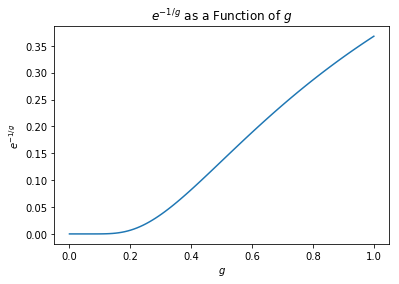

In [4]:
fig = plt.figure()

plt.plot(x, approx)
plt.xlabel('$g$')
plt.ylabel('$e^{-1/g}$')
plt.title('$e^{-1/g}$ as a Function of $g$')

As shown in the written work, the Taylor Series for this function about $g=0$ is

$$f(g)=0 $$

# Part 3

## The Brute Force Method

In [5]:
x = sympy.symbols('x')
poly_terms = np.array([0])

### Functions Used

These functions are used to multiply large polynomials together and determine the coefficients $c_n$ using a heavily computational brute force approach.

In [6]:
def n_term(n):
    return (1/sympy.factorial(n))*(-1)**n

def get_polynomial(x, poly_terms):
    polynomial = 0
    for (i,p_i) in enumerate(poly_terms):
        polynomial += p_i*x**i
    return polynomial

def append_pn(poly_terms, n):
    polynomial = get_polynomial(x, poly_terms)
    G = 0
    for i in range(n):
        G += n_term(i)*(polynomial)**i
    G *= x
    G.simplify()
    G = sympy.Poly(G)
    return np.append(poly_terms, G.all_coeffs()[-1-n])

def get_n_terms(poly_terms, n):
    for i in range(n):
        poly_terms = append_pn(poly_terms, i+1)
    return poly_terms

The first ten terms are shown below (the sympy package can't seem to handle the large polynomials involved for n>10).

In [7]:
poly_terms = get_n_terms(poly_terms, 10)
poly_terms

array([0, 1, -1, 3/2, -8/3, 125/24, -54/5, 16807/720, -16384/315,
       531441/4480, -156250/567], dtype=object)

## The Smart Way, Closed Form Potential Solution

The function below defines what we have hypothesized $c_n$ to be

$$c_n =\frac{(-1)^{n+1}n^{n-2}}{(n-1)!} $$

In [8]:
def cn(n):
    return (n**(n-2))*((-1)**(n+1))/(sympy.factorial(n-1))

Obtain and print the values of $c_n$.

In [9]:
n = np.linspace(1, 100, 100, dtype='float')
poly_terms = [cn(i) for i in n]
poly_terms